# Modeling Parkinson Disease

## Requirements
#### Chemical Synapse
-  Nearly Instantaneous Rise
-  Gradual Rise

#### Short-Term Depression and Facilitation
-  STP
-  STF
#### Spike Timing Dependent Plasticity (STDP)
-  Song Abbott Model

## Modeling Basal Ganglia
-  Terman 2002, Rubin and Terman 2004

### Chamical Synapse
-  Nearly Instantaneus Rise:
\begin{align}
I_{syn} & = g_{syn}(t)(v_{rev}-v_{post}\\
g_{syn} &= \bar{g}_{syn} s(t)\\
\frac{ds}{dt}&= \frac{1+tanh(v/10)}{2}\frac{1-s}{\tau_r}-\frac{s}{\tau_d}
\end{align}


<!-- \begin{align}
\begin{split}\label{eq:1}
    a ={}& b + c + d\\
         & + e + f + g
\end{split}\\
\begin{split}\label{eq:2}
    k ={}& l + m + n + m + n + m + n\\
         & + o + p + q
\end{split}\\
    r ={}& s + t (u + v + w)\label{eq:3}
\end{align} -->

In [1]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl

def alpha_h(v): return 0.128 * exp(-(v + 50.0) / 18.0)
def alpha_m(v): return 0.32 * (v + 54) / (1.0 - exp(-(v + 54.0) / 4.0))
def alpha_n(v): return 0.032 * (v + 52) / (1.0 - exp(-(v + 52.0) / 5.0))
def beta_h(v):  return 4.0 / (1.0 + exp(-(v + 27.0) / 5.0))
def beta_m(v):  return 0.28 * (v + 27.0) / (exp((v + 27.0) / 5.0) - 1.0)
def beta_n(v):  return 0.5 * exp(-(v + 57.0) / 40.0)
def h_inf(v):   return alpha_h(v) / (alpha_h(v) + beta_h(v))
def m_inf(v):   return alpha_m(v) / (alpha_m(v) + beta_m(v))
def n_inf(v):   return alpha_n(v) / (alpha_n(v) + beta_n(v))



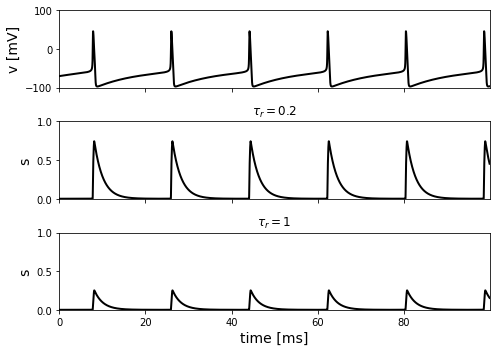

In [2]:
def derivative(x0, t):
    '''
    define Traub Model
    '''
    v, m, n, h, s = x0
    dv = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h
    ds = 0.5 * (1.0+np.tanh(0.1 * v)) * (1-s)/tau_r - s/tau_d

    return [dv, dm, dn, dh, ds]

def initial_condition(v):
    m = m_inf(v)
    h = h_inf(v)
    n = n_inf(v)
    s = 0.0
    return [v, m, n, h, s]

c = 1
g_k = 80.0
g_na = 100.0
g_l = 0.1
v_k = -100.0
v_na = 50.0
v_l = -67.0
i_ext = 1.5
t_final = 100.0
dt = 0.01
v = -70.0

tau_d = 2.0
tau_r = 0.2
x0 = initial_condition(v)
t = np.arange(0, t_final, dt)
sol = odeint(derivative, x0, t)
V = sol[:, 0]
S1 = sol[:, -1]

# --------------------------------------------------------------#
tau_r = 1.0
sol = odeint(derivative, x0, t)
S2 = sol[:, -1]

fig, ax = pl.subplots(3, figsize=(7, 5), sharex=True)
ax[0].plot(t, V, lw=2, c="k")
ax[1].plot(t, S1, lw=2, c="k")
ax[2].plot(t, S2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])

ax[1].set_title(r"$\tau_r=${}".format(0.2))
ax[2].set_title(r"$\tau_r=${}".format(1))
pl.tight_layout()
pl.show()

-  Gradual Rise
\begin{align}
I_{syn} & = \bar{g}_{syn}s(t)(v_{rev}-v_{post})\\
\frac{dq}{dt} &= \frac{1+tanh(v/10)}{2}\frac{1-q}{\tau_{r,q}}-\frac{q}{\tau_{d,q}}\\
\frac{ds}{dt} &= q \frac{1-s}{\tau_r}-\frac{s}{\tau_d}
\end{align}

We always choose $\tau_{r,q}=0.1$ ms.
$\tau_d$ measures how fast s decays, and $\tau_r$ measures how fast it rises initially.


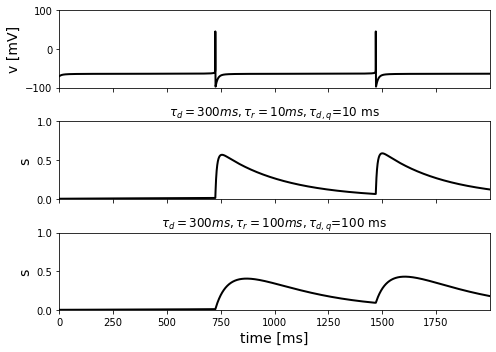

In [3]:
def derivative(x0, t):
    '''
    define Traub Model
    '''
    v, m, n, h, q, s = x0
    dv = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h
    dq = 0.5 * (1.0+np.tanh(0.1 * v)) * (1 - q) * 10.0 - q / tau_d_q
    ds = q * (1 - s)/tau_r - s/tau_d

    return [dv, dm, dn, dh, dq, ds]


def initial_condition(v):
    m = m_inf(v)
    h = h_inf(v)
    n = n_inf(v)
    q = 0.0
    s = 0.0
    return [v, m, n, h, q, s]

c = 1.0
g_k = 80.0
g_na = 100.0
g_l = 0.1
v_k = -100.0
v_na = 50.0
v_l = -67.0
i_ext = 0.12
t_final = 2000.0
dt = 0.01
v = -70.0

tau_d = 300.0
tau_r = 10.0
tau_d_q = 10
x0 = initial_condition(v)
t = np.arange(0, t_final, dt)
sol = odeint(derivative, x0, t)
V = sol[:, 0]
S1 = sol[:, -1]

# --------------------------------------------------------------#
tau_d = 300.0
tau_r = 100.0
tau_d_q = 100.0
sol = odeint(derivative, x0, t)
S2 = sol[:, -1]

fig, ax = pl.subplots(3, figsize=(7, 5), sharex=True)
ax[0].plot(t, V, lw=2, c="k")
ax[1].plot(t, S1, lw=2, c="k")
ax[2].plot(t, S2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])

ax[1].set_title(r"$\tau_d=300 ms, \tau_r=10 ms, \tau_{d,q}$=10 ms")
ax[2].set_title(r"$\tau_d=300 ms, \tau_r=100 ms, \tau_{d,q}$=100 ms")

pl.tight_layout()
pl.show()

In [4]:
def tau_peak_function(tau_d, tau_r, tau_d_q):

    dt = 0.01
    dt05 = 0.5 * dt

    s = 0
    t = 0
    s_inc = exp(-t / tau_d_q) * (1.0 - s) / tau_r - s * tau_d
    while s_inc > 0:
        t_old = t
        s_inc_old = s_inc
        s_tmp = s + dt05 * s_inc
        s_inc_tmp = exp(-(t + dt05) / tau_d_q) * (1.0 - s_tmp) / tau_r - s_tmp / tau_d
        s = s + dt * s_inc_tmp
        t = t + dt
        s_inc = exp(-t / tau_d_q) * (1.0 - s) / tau_r - s / tau_d
    
    return (t_old * (-s_inc) + t * s_inc_old) / (s_inc_old - s_inc)


def tau_d_q_function(tau_d, tau_r, tau_hat):
    
    # set an interval for tau_d_q
    tau_d_q_left = 1.0
    while tau_peak_function(tau_d, tau_r, tau_d_q_left) > tau_hat:
        tau_d_q_left *= 0.5
    
    tau_d_q_right = tau_r
    while tau_peak_function(tau_d, tau_r, tau_d_q_right) < tau_hat:
        tau_d_q_right *= 2.0

    # bisection method
    while tau_d_q_right - tau_d_q_left > 1e-12:
        tau_d_q_mid = 0.5 * (tau_d_q_left + tau_d_q_right)
        if (tau_peak_function(tau_d, tau_r, tau_d_q_mid) <= tau_hat):
            tau_d_q_left = tau_d_q_mid
        else:
            tau_d_q_right = tau_d_q_mid

    return 0.5 * (tau_d_q_left + tau_d_q_right)

5.1144654185742695
107.03619878043985


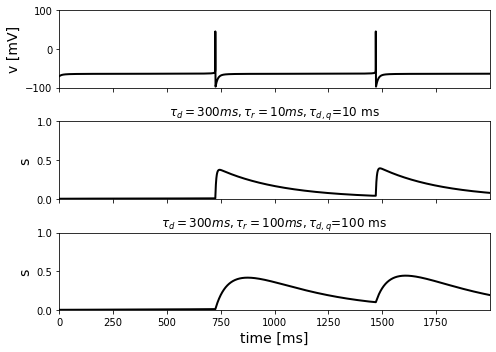

In [5]:
c = 1.0
g_k = 80.0
g_na = 100.0
g_l = 0.1
v_k = -100.0
v_na = 50.0
v_l = -67.0
i_ext = 0.12
t_final = 2000.0
dt = 0.01
v = -70.0

tau_d = 300.0
tau_r = 10.0
tau_peak = 20.0
tau_d_q = tau_d_q_function(tau_d, tau_r, tau_peak)
print (tau_d_q)

x0 = initial_condition(v)
t = np.arange(0, t_final, dt)
sol = odeint(derivative, x0, t)
V = sol[:, 0]
S1 = sol[:, -1]

# --------------------------------------------------------------#
tau_r = 100.0
tau_d = 300.0
tau_peak = 150.0
tau_d_q = tau_d_q_function(tau_d, tau_r, tau_peak)
print (tau_d_q)

sol = odeint(derivative, x0, t)
S2 = sol[:, -1]

fig, ax = pl.subplots(3, figsize=(7, 5), sharex=True)
ax[0].plot(t, V, lw=2, c="k")
ax[1].plot(t, S1, lw=2, c="k")
ax[2].plot(t, S2, lw=2, c="k")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 100)
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel("time [ms]", fontsize=14)
ax[0].set_ylabel("v [mV]", fontsize=14)
ax[1].set_ylabel("s", fontsize=14)
ax[2].set_ylabel("s", fontsize=14)
ax[0].set_yticks([-100, 0, 100])
ax[1].set_yticks([0, 0.5, 1])
ax[2].set_yticks([0, 0.5, 1])

ax[1].set_title(r"$\tau_d=300 ms, \tau_r=10 ms, \tau_{d,q}$=10 ms")
ax[2].set_title(r"$\tau_d=300 ms, \tau_r=100 ms, \tau_{d,q}$=100 ms")

pl.tight_layout()
pl.show()

![](fig_20_8.png)
Buildup of the synaptic gating variable s over several action
potentials. The upper panel shows the voltage trace of an RTM neuron firing with period $T \approx 74.5$ ms. The lower panel shows the time evolution of $s$, with $\tau_r = 10$ ms, $\tau_{d,q}5$ ms, $\tau_d = 300$.

![](fig_20_9.png)
Analogous to upper figure, but with $\tau_r = 100$ 100 ms, $\tau_d=1$ 1 ms, $\tau_d = 500$ ms.

### NEST implementation

![](ampa_coupled.png)

## Short-Term Depression and Facilitation
### The Tsodyks-Markram Model of Short-Term Depression

\begin{align}
\frac{dp}{dt} & = \frac{1-p-q}{\tau_{rec}}-C(1+tanh\frac{v}{10})p \ln(\frac{1}{1-U}) \\
\frac{dq}{dt} & = - \frac{q}{\tau_{d,q}}+ C(1+tanh\frac{v}{10})p \ln(\frac{1}{1-U}) \\
\frac{ds}{dt} & = q \frac{1-s}{\tau_r}-\frac{s}{\tau_d}
\end{align}

The variable $p$ represents the fraction of neurotransmitter that is available for release, $q$ is the fraction that is active in the synaptic cleft, and $r$ is the fraction that is "inactive," i.e., has been removed from the synaptic cleft, and is in the process of being transported back to the pre-synaptic terminal.

![](fig_39_2.png)
Voltage trace of a periodically firing RTM neuron ($I =0.5$) and the functions $p$, $q$, $s$. The parameters are $\tau_{rec}$ = 500, $U$ =0.5, $\tau_{d,q}=5$ ms, $\tau_r = 0.5$ ms, $\tau_d=3$.

The final form of our smoothed version of the Tsodyks-Markram model:

\begin{align}
\frac{dp}{dt} &= \frac{1-p-q}{\tau_{rec}}-C\big( 1+tanh\frac{v}{10} \big) p W \\
\frac{dq}{dt} &= -\frac{q}{\tau_{d,q}} + C \big( 1+tanh\frac{v}{10} \big) pW \\
\frac{ds}{dt} &= q \frac{1-s}{\tau_r} - \frac{s}{\tau_d}\\
\frac{dW}{dt} & = - \frac{e^{W-W0}-1}{\tau_{facil}} + C\nu \big( 1+tanh\frac{v}{10} \big)\\
W0 &=\ln \frac{1}{1-U0}, \hspace{1cm} \nu = \ln \frac{1}{1-\mu}
\end{align}

![](fig_39_4.png)
Voltage trace of a periodically firing RTM neuron ($I =0.5$),
and the functions $p$, $q$, $s$,and $U =1 - e^{-W}$  The parameters are $\tau_{rec}$= 300 ms, $\tau_{facil}$ = 500 ms, $U_0$ =0.1, \$mu$ =0.2, $\tau_{d,q}$=5, $\tau_r$=0.5, $\tau_d$=3, $C$ =1.45.

### STDP

![](stdp.jpeg)

# STN CELL

\begin{align}
C_m \frac{dv}{dt} &= -(I_L + I_K + I_{Na}+I_T+I_{Ca}+I_{AHP})-I_{G\rightarrow S}\\ 
I_L & = g_L(v-v_L) \\
I_K & = g_K n^4 (v-v_K) \\
I_{Na} &= g_{Na} m_{\infty}^3(v) (v-v_{Na})\\
I_T &= g_T a_{\infty}^3(v) b_{\infty}^2 (r) (v-v_{Ca})\\
I_{Ca} &= g_{Ca} s_{\infty}^2(v) (v-v_{Ca})\\
I_{AHP} &= g_{AHP}(v-v_k)([Ca]/([Ca]+k_1))\\
I_{G\rightarrow S} &= g_{G\rightarrow S} (v-v_{G\rightarrow S}) \sum s_j
\end{align}

-  Gating variables

\begin{align}
\frac{dX}{dt} &= \phi_X \frac{X_{\infty}(v) - X}{\tau_X(v)}\\
\tau_X (v) &= \tau_X^0 + \tau_X^1 / \big[ 1+\exp(-(v-\theta_X^{\tau})/\sigma_X^{\tau}) \big] \hspace{1cm} (X:n, h, r)
\end{align}
steady state of $X=n,m,h,a,r,s$ are:
$$
X_{\infty}(v) = \frac{1}{1+\exp[-(v-\theta_X)/\sigma_X]}
$$
for $T$ current:
$$
b_{\infty}(r) = \frac{1}{1+\exp[(r-\theta_b)(\sigma_b)]}-\frac{1}{1+\exp[-\theta_b/\sigma_b]}
$$

# GPe CELL

\begin{align}
C_m \frac{dv}{dt} &= -(I_L + I_K + I_{Na}+I_T+I_{Ca}+I_{AHP})-I_{S\rightarrow G}-I_{G\rightarrow G} + I_{app}\\
I_T &= g_T a_{\infty}^3(v)r(v-v_{Ca})
\end{align}

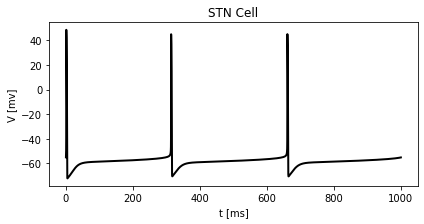

In [6]:
import numpy as np
import pylab as plt
from numpy import exp
from scipy.integrate import odeint
def sinf(v): return 1./(1.+exp(-(v-thetas)/sigmas))
def minf(v): return 1./(1.+exp(-(v-thetam)/sigmam))
def hinf(v): return 1./(1.+exp(-(v-thetah)/sigmah))
def ninf(v): return 1./(1.+exp(-(v-thetan)/sigman))
def ainf(v): return 1/(1+exp(-(v-thetaa)/sigmaa))
def binf(r): return 1/(1+exp((r-thetab)/sigmab))-1/(1+exp(-thetab/sigmab))
def rinf(v): return 1/(1+exp(-(v-thetar)/sigmar))
def taun(v): return taun0+taun1/(1+exp(-(v-thn)/sigmant))
def tauh(v): return tauh0+tauh1/(1+exp(-(v-thh)/sigmaht))
def taur(v): return taur0+taur1/(1+exp(-(v-thr)/sigmart))

def il(v): return gl * (v - vl)
def ina(v, h): return gna * (minf(v)) ** 3 * h * (v - vna)
def ik(v, n): return gk * n ** 4 * (v - vk)
def iahp(v, ca): return gahp * ca / (ca + k1) * (v - vk)
def ica(v): return gca * ((sinf(v)) ** 2) * (v - vca)
def it(v, r): return gt * (ainf(v) ** 3) * (binf(r) ** 2) * (v - vca)


def ode_sys(x0, t):

    v, h, n, r, ca = x0

    dv = -(il(v) + ina(v, h) + ik(v, n) +
           iahp(v, ca) + ica(v) + it(v, r))  # - isyn
    dh = phi * (hinf(v) - h) / tauh(v)
    dn = phi * (ninf(v) - n) / taun(v)
    dr = phir * (rinf(v) - r) / taur(v)
    dca = eps * (-ica(v) - it(v, r) - kca * ca) # * phi
    # ds = alpha * (1 - s) * sinf(v + ab) - beta * s

    return [dv, dh, dn, dr, dca]


def init(v):

    h = hinf(v)
    n = ninf(v)
    r = rinf(v)
    ca = 0
    # s = 0

    return [v, h, n, r, ca]


vl = -60.
vna = 55.
vk = -80.
thetam = -30
sigmam = 15
gl = 2.25
gna = 37.5
gk = 45.
# tn = 1.
# th = 0.05
gahp = 9.
gca = .5
vca = 140.
k1 = 15.
eps = 5e-05
kca = 22.5
thetas = -39.
sigmas = 8.
# xp = 1.
# i = 0.
thetah = -39
sigmah = -3.1
thetan = -32.
sigman = 8.
taun0 = 1
taun1 = 100.
thn = -80.
sigmant = -26.
tauh0 = 1
tauh1 = 500
thh = -57.
sigmaht = -3.
phi = .75
thetaa = -63.
sigmaa = 7.8
gt = .5
phir = .5
thetar = -67
sigmar = -2.
taur0 = 7.1
taur1 = 17.5
thr = 68.
sigmart = -2.2

alpha = 5
beta = 1.
ab = -30.
gGtoS = 5
vGtoS = -100
thetab = .25
sigmab = -.07



t = np.arange(0, 1000, 0.01)
x0 = init(-55.0)
sol = odeint(ode_sys, x0, t)

fig, ax = plt.subplots(1, figsize=(6, 3))
ax.plot(t, sol[:, 0], c='k', lw=2)
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mv]")
plt.tight_layout()
# plt.savefig("stn.png")
plt.title("STN Cell")
plt.show()

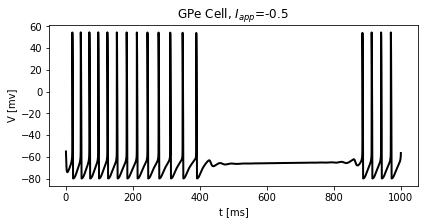

In [7]:
import numpy as np
import pylab as plt
from numpy import exp
from scipy.integrate import odeint


def ainfg(v): return 1/(1+exp(-(v-thag)/sigag))
def sinfg(v): return 1/(1+exp(-(v-thsg)/sigsg))
def rinfg(v): return 1/(1+exp(-(v-thrg)/sigrg))
def minfg(v): return 1./(1.+exp(-(v-thmg)/sigmg))
def ninfg(v): return 1./(1.+exp(-(v-thng)/signg))
def taung(v): return taun0g+taun1g/(1+exp(-(v-thngt)/sng))
def hinfg(v): return 1./(1.+exp(-(v-thhg)/sighg))
def tauhg(v): return tauh0g+tauh1g/(1+exp(-(v-thhgt)/shg))

def itg(vg,rg):return gtg*(ainfg(vg)**3)*rg*(vg-vcag)
def inag(vg,hg):return gnag*(minfg(vg)**3)*hg*(vg-vnag)
def ikg(vg,ng):return gkg*(ng**4)*(vg-vkg)
def iahpg(vg,cag):return gahpg*(vg-vkg)*cag/(cag+k1g)
def icag(vg):return gcag*((sinfg(vg))**2)*(vg-vcag)
def ilg(vg):return glg*(vg-vlg)


def ode_sys(x0, t):

    vg, hg, ng, rg, cag = x0
    dvg= -(itg(vg,rg)+inag(vg,hg)+ikg(vg,ng)+iahpg(vg,cag)+icag(vg)+ilg(vg)) +iapp # -isyngg(vg,stot)-isyng
    dhg= phihg*(hinfg(vg)-hg)/tauhg(vg)
    dng= phing*(ninfg(vg)-ng)/taung(vg)
    drg= phig*(rinfg(vg)-rg)/taurg
    dcag=epsg*(-icag(vg)-itg(vg,rg) - kcag*cag)
    # dsg=alphag*(1-sg)*sinfg(vg+abg)-betag*sg

    return [dvg, dhg, dng, drg, dcag]



def init(vg):

    hg = hinfg(vg)
    ng = ninfg(vg)
    rg = rinfg(vg)
    cag = 0
    # sg = 0

    return [vg, hg, ng, rg, cag]


gnag = 120.
gkg = 30.
gahpg = 30.
gtg = .5
gcag = .1
glg = .1
vnag = 55.
vkg = -80.
vcag = 120.
vlg = -55.
thag = -57.
sigag = 2.
thsg = -35.
sigsg = 2.
thrg = -70.
sigrg = -2.
taurg = 30.
thmg = -37.
sigmg = 10.
thng = -50.
signg = 14.
taun0g = .05
taun1g = .27
thngt = -40
sng = -12
thhg = -58
sighg = -12
tauh0g = .05
tauh1g = .27
thhgt = -40
shg = -12
k1g = 30.
kcag = 20.
epsg = 0.0001
phig = 1.
phing = .05
phihg = .05
gGtoG = 1
vGtoG = -100.
gStoG = 0.03
vStoG = 0
alphag = 2
betag = .08
abg = -20
iapp = -0.5

t = np.arange(0, 1000, 0.01)
x0 = init(-55.0)
sol = odeint(ode_sys, x0, t)

fig, ax = plt.subplots(1, figsize=(6, 3))
ax.plot(t, sol[:, 0], c='k', lw=2)
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mv]")
plt.tight_layout()
plt.title(r"GPe Cell, $I_{app}$=%.1f" % iapp)
plt.show()


## NEST implementation

![](terub_stn.png)

![](terub_gpe.png)